<a href="https://colab.research.google.com/github/shankha2018/Consensus-and-Ensemble-Model/blob/main/Imbalanced%20Data%20with%20Random%20Ratio/classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Classification

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### Reading the Dataset

In [ ]:
datasetUrl = 'https://raw.githubusercontent.com/SohelRaja/Consensus-and-Ensemble-Model/main/Datasets/colon.csv'

In [ ]:
colon = pd.read_csv(datasetUrl)

In [ ]:
colon.head(5)

,Unnamed: 0,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,1,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.0712,3166.5800,930.3038,2018.3550,2065.5945,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.23810,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,2,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.3625,2490.8738,3759.5850,4268.9185,4166.1914,4286.6900,2699.2844,2796.0833,1015.9143,1459.10250,2865.0388,1156.9563,1351.9650,3218.32130,3855.5337,3097.4539,1667.5425,2779.3037,1064.2675,2430.8790,2814.2800,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.53810,91.29500,86.03611,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.6200,1378.1200,797.1925,1880.1875,1389.6302,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.11190,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,4,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.6912,1139.6274,2662.0974,2636.1562,3134.7476,4244.0700,1186.8938,2342.3820,792.2143,1133.23750,969.8237,835.3862,1392.7162,3034.57130,4699.3950,3312.4812,854.4288,1880.5400,1329.3225,3124.2488,2456.0930,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.44524,90.45500,140.83057,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,5,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,2648.2676,1073.41000,1207.41

### Data Analysis

In [ ]:
colon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2002 entries, Unnamed: 0 to Class
dtypes: float64(2000), int64(1), object(1)
memory usage: 969.8+ KB


In [ ]:
colon_arr = np.array(colon.columns)
def unique_value_check():
    len_col = len(colon_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(len_col):
        val = len(np.unique(colon[colon_arr[i]]))
        if val != 62:
            print(i," : ",colon_arr[i],":",val,end='\t')
            if(val<10):
                print("---> ",colon[colon_arr[i]].unique().tolist())
            else:
                print("---> [Too Much Values]")
print(unique_value_check())
colon_arr

Column Name : No. of unique value
---------------------------------
870  :  M16827 : 61	---> [Too Much Values]
1022  :  R38513_ : 61	---> [Too Much Values]
1077  :  R55778 : 61	---> [Too Much Values]
1129  :  T55840 : 61	---> [Too Much Values]
1158  :  T89175 : 61	---> [Too Much Values]
1179  :  U20285 : 61	---> [Too Much Values]
1358  :  U02081 : 61	---> [Too Much Values]
1404  :  M14676 : 61	---> [Too Much Values]
1474  :  L26050_ : 61	---> [Too Much Values]
1521  :  U07139 : 61	---> [Too Much Values]
1524  :  T47719 : 61	---> [Too Much Values]
1531  :  M34344 : 61	---> [Too Much Values]
1701  :  H62466 : 61	---> [Too Much Values]
1740  :  M81651 : 61	---> [Too Much Values]
1771  :  J05032 : 61	---> [Too Much Values]
1864  :  T91121 : 61	---> [Too Much Values]
1947  :  R44112 : 61	---> [Too Much Values]
1984  :  U12140 : 61	---> [Too Much Values]
2001  :  Class : 2	--->  ['Abnormal', 'Normal']
None


array(['Unnamed: 0', 'H55933', 'R39465', ..., 'R77780', 'T49647', 'Class'],
      dtype=object)

In [ ]:
colon.describe()

,Unnamed: 0,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,...,H77510,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,7015.786703,4966.959971,4094.727906,3987.789302,2937.126132,4705.119294,3588.800302,2872.288627,4680.191126,4039.661958,3399.386232,2283.847035,3064.709573,3169.054361,3087.897071,4342.216085,2906.718926,2275.056023,2516.240561,2920.266588,3198.948548,4672.716847,3544.121735,3243.616007,2146.440465,4441.338633,1319.834292,2620.612727,2398.687153,2416.720414,2728.851989,1829.040311,3132.103775,1951.479187,1326.721536,2320.837516,2239.639920,1594.724263,2306.324157,...,78.244234,81.977560,223.428349,68.373891,57.369234,72.967761,463.727180,82.297017,128.950785,60.494657,271.628951,203.333509,41.380875,248.155971,79.882218,183.262590,103.252299,90.263649,71.159980,208.169699,90.730603,49.362177,112.489315,49.123790,55.558851,72.746414,61.462875,219.899538,65.092621,186.239012,186.204532,100.227903,293.222722,124.653387,133.186935,184.136636,84.118387,114.930000,53.251230,42.965827
std,18.041619,3092.970593,2188.890465,1818.080945,2019.086906,1356.932895,2400.848121,1872.106074,1122.365445,2417.239210,2018.044259,1841.232524,805.367040,1752.976635,1629.209786,1531.673225,2091.829860,1597.413732,954.275623,1455.282461,1646.820322,1657.661682,2202.233176,2012.013956,1923.390782,845.154632,2486.862067,521.621695,1314.871487,1332.286091,1236.560380,1708.641893,844.895807,1771.742108,877.221537,594.530875,1324.342855,1261.389033,795.542247,1330.420236,...,55.980613,52.123156,384.934640,38.273377,44.448600,55.354463,479.368497,48.883995,147.003258,51.905583,163.084930,146.025051,24.685863,325.837881,53.547760,201.103915,66.941879,99.478449,41.911208,136.261553,67.567683,27.559189,95.161307,23.945443,46.316973,54.988725,52.075881,200.746139,42.511124,116.216778,117.605889,78.022713,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175
min,1.000000,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815500,967.785000,962.561500,886.018740,855.455000,802.304750,758.529200,745.535000,736.873800,716.773740,672.956240,666.181300,658.878700,607.091250,606.788760,601.550000,590.352360,569.736900,568.015000,566.867500,561.336240,538.690000,524.087500,502.191250,473.665000,461.221250,460.318760,439.676240,422.656250,408.691830,...,6.427500,6.416250,6.382500,6.370000,6.361250,6.330952,6.317500,6.298750,6.296250,6.295000,6.271250,6.261250,6.259524,6.253571,6.220000,6.191667,6.161250,6.156250,6.136250,6.121250,6.088158,6.081250,6.072222,6.068750,6.068750,6.032895,6.016071,6.010000,5.967500,5.960000,5.950000,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250
25%

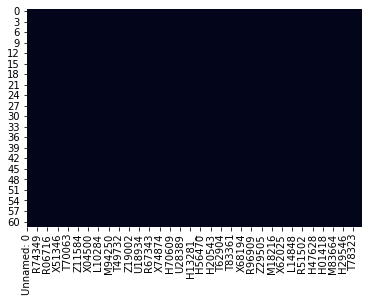

In [ ]:
sns.heatmap(colon.isnull(),cbar=False)

In [ ]:
df = colon.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Columns: 2001 entries, H55933 to Class
dtypes: float64(2000), object(1)
memory usage: 969.4+ KB


In [ ]:
df = colon.drop(columns=['Unnamed: 0'],axis=1)

In [ ]:
df.head()


,H55933,R39465,R39465_,R85482,U14973,R02593,T51496,H80240,T65938,T55131,T72863,H86060_,X63432,H20709,U14971,T52342,L28809,T63508,H09263,T49423,H79852,J02763,R22197,T59954,H80240_,T95018,H86060,T63484,R02593_,M11799,T61609,T62220,T51574,T48041,T96832,H54676,R86975,T63258,control1,control2,...,R78142,R62945,X70070,U05040,U33429,T60778,X04011,L12350,R06749,U24105,T57468,M55422,M64110,U14577,K03474,T49204,D00760,H20856,R98410,H62854,T89666,D38551,U12140,M63239,D14689,M67454,T64128,R76825,U15212,X67699,R70790,L11706,T90549,D17390,M33210,H18490,H40891,R77780,T49647,Class
0,8589.4160,5468.2407,4263.4077,4064.9358,1997.8930,5282.3250,2169.7200,2773.4211,7526.3860,4607.6763,2598.0600,1522.6462,1300.5988,1181.6300,2417.95830,3139.4000,2473.2612,1306.9038,1285.6025,1900.3613,3504.2139,2428.0525,5150.0137,3855.8400,1806.4750,3192.4130,872.0143,1135.82390,2365.2424,1567.2363,1643.5575,1582.03500,2854.9875,2513.3350,930.0712,3166.5800,930.3038,2018.3550,2065.5945,2065.5945,...,135.19624,98.47250,74.65250,46.80125,75.626190,228.42250,77.22375,47.94625,34.68750,225.91500,243.41250,35.825000,177.23810,64.71125,88.44444,107.83375,42.16750,47.62125,163.80125,86.000000,69.35250,90.344444,58.44750,52.86625,12.202632,20.689285,86.81000,51.46000,289.42374,99.11072,67.56125,259.91250,138.89874,88.23250,39.66786,67.82875,75.67750,83.52250,28.70125,Abnormal
1,9164.2540,6719.5293,4883.4487,3718.1590,2015.2214,5569.9070,3849.0588,2793.3875,7017.7340,4802.2524,1672.9750,1792.1769,3792.5425,3630.3826,1906.21310,5745.3960,1919.4462,2036.2838,2253.3625,2490.8738,3759.5850,4268.9185,4166.1914,4286.6900,2699.2844,2796.0833,1015.9143,1459.10250,2865.0388,1156.9563,1351.9650,3218.32130,3855.5337,3097.4539,1667.5425,2779.3037,1064.2675,2430.8790,2814.2800,2814.2800,...,169.08000,76.40750,119.05750,62.59750,81.463100,1803.76370,100.05250,101.37625,61.82250,330.16125,202.20500,37.129760,605.53810,91.29500,86.03611,48.45875,37.41750,86.38625,163.13875,146.125000,89.59000,124.708330,35.79375,62.05875,39.719738,83.142860,321.33750,41.59125,263.36874,126.78929,92.23875,96.27625,150.59000,82.23750,85.03333,152.19500,186.56750,44.47250,16.77375,Normal
2,3825.7050,6970.3613,5369.9688,4705.6500,1166.5536,1572.1678,1325.4025,1472.2587,3296.9512,2786.5820,2441.4187,1487.6711,1315.8538,855.4550,802.30475,3251.1084,781.9950,1618.6500,1066.8387,1006.2112,1436.7850,658.8787,1924.7913,2080.6611,1155.9438,1444.0964,853.4429,734.52875,763.3075,704.1175,591.8088,807.39374,2138.8726,1734.1150,905.6200,1378.1200,797.1925,1880.1875,1389.6302,1389.6302,...,62.98000,51.04375,104.76250,10.15750,47.025000,460.56750,64.46125,159.98000,99.53250,122.04250,97.26750,23.496430,119.11190,75.15500,122.41389,40.46750,6.15625,10.62375,128.99374,24.917105,77.06375,33.443054,14.43625,30.18500,24.805264,6.016071,116.18375,50.87375,71.40125,151.87738,82.71500,31.10250,193.92000,76.97250,224.62024,31.22500,42.65625,16.09250,15.15625,Abnormal
3,6246.4487,7823.5340,5955.8350,3975.5642,2002.6132,2130.5430,1531.1425,1714.6312,3869.7850,4989.4070,1723.5800,1298.7250,1309.3475,1789.6700,1587.79170,3496.1458,1226.2975,1597.2812,1144.6912,1139.6274,2662.0974,2636.1562,3134.7476,4244.0700,1186.8938,2342.3820,792.2143,1133.23750,969.8237,835.3862,1392.7162,3034.57130,4699.3950,3312.4812,854.4288,1880.5400,1329.3225,3124.2488,2456.0930,2456.0930,...,61.42375,97.97375,34.58875,63.75875,45.223810,799.94500,71.27625,24.16875,40.38625,198.43500,170.53876,16.402382,172.44524,90.45500,140.83057,31.11625,21.02875,70.51875,203.06375,174.063160,86.48125,76.851390,38.58875,10.61125,35.985527,43.935715,239.27000,29.55875,367.58124,152.59525,41.68375,5.92500,183.00626,74.52875,67.71072,48.33875,42.52000,49.98250,16.08500,Normal
4,3230.3286,3694.4500,3400.7400,3463.5857,2181.4202,2922.7820,2069.2463,2948.5750,3303.3710,3109.4130,2724.2660,2557.7847,3164.6963,2285.3088,2576.74880,3056.7250,1391.5900,2162.5537,1540.2500,2705.6750,1271.7188,4439.8910,2030.6738,2249.8188,2150.1218,3350.5024,1563.9893,1903.58250,1568.1113,1368.8175,

In [ ]:
X = df.drop(['Class'],axis=1)
y = df['Class']

### Taking Dummy Values

In [ ]:
Y = pd.get_dummies(y,drop_first=True)
Y.head()

,Normal
0,0
1,1
2,0
3,1
4,0


### Spliting of Training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

### KNN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
K = 15
acc = np.zeros((K-1))
for k in range(1,K):
  clf_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  y_pred_knn = clf_knn.predict(X_test)
  acc[k-1] = metrics.accuracy_score(y_test,y_pred_knn)

In [ ]:
print("The Best Accuracy is:",acc.max()*100,"% with k=",acc.argmax()+1)

The Best Accuracy is: 92.3076923076923 % with k= 5


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
y_pred_knn = knn_model.predict(X_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_pred_knn))

Accuracy :  0.9230769230769231


In [ ]:
print("Train Accuracy :", knn_model.score(X_train, y_train), "Testing Accuracy :", knn_model.score(X_test, y_test))

Train Accuracy : 0.8571428571428571 Testing Accuracy : 0.9230769230769231


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred_knn, average='macro'))
print(precision_score(y_test, y_pred_knn, average='micro'))
print(precision_score(y_test, y_pred_knn, average='weighted'))

0.9
0.9230769230769231
0.9384615384615385


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_logreg = LogisticRegression(max_iter=50, verbose=1, random_state=101)

In [ ]:
clf_logreg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [ ]:
y_pred_logreg = clf_logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set:{:.2f}'.format(clf_logreg.score(X_test,y_test)*100))

Accuracy of logistic regression classifier on test set:61.54


In [ ]:
print("Train Accuracy :", clf_logreg.score(X_train,y_train), "Testing Accuracy :", clf_logreg.score(X_test, y_test))

Train Accuracy : 1.0 Testing Accuracy : 0.6153846153846154


In [ ]:
print(precision_score(y_test, y_pred_logreg, average='macro'))
print(precision_score(y_test, y_pred_logreg, average='micro'))
print(precision_score(y_test, y_pred_logreg, average='weighted'))

0.6309523809523809
0.6153846153846154
0.7087912087912087


### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)
y_pred_gnb = clf_gnb.predict(X_test)

In [ ]:
print("Accuracy ",metrics.accuracy_score(y_test,y_pred_gnb)*100)

Accuracy  46.15384615384615


In [ ]:
print("Train Accuracy :", clf_gnb.score(X_train,y_train), "Testing Accuracy :",clf_gnb.score(X_test,y_test))

Train Accuracy : 0.6530612244897959 Testing Accuracy : 0.46153846153846156


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred_gnb)
print(confusion_matrix)

[[2 7]
 [0 4]]


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf_dt_entropy.fit(X_train,y_train)
y_pred = clf_dt_entropy.predict(X_test)
dt_accuracy = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Decision Tree): ',dt_accuracy,'%')
print("Train Accuracy :", clf_dt_entropy.score(X_train,y_train), "Testing Accuracy :", clf_dt_entropy.score(X_test, y_test))

Accuracy(Decision Tree):  46.15 %
Train Accuracy : 1.0 Testing Accuracy : 0.46153846153846156


### SVM

In [ ]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_train,y_train)
y_pred = clf_svm.predict(X_test)
svm_accuracy = round(metrics.accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(SVM): ',svm_accuracy,'%')
print("Train Accuracy :", clf_svm.score(X_train, y_train), "Testing Accuracy :", clf_svm.score(X_test, y_test))

Accuracy(SVM):  92.31 %
Train Accuracy : 0.8979591836734694 Testing Accuracy : 0.9230769230769231


### Bagging Approach

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

In [ ]:
n_estimators = [2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500]
train_result_rf = []
test_result_rf = []

#### Random Forest with gini criterion 

In [ ]:
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)


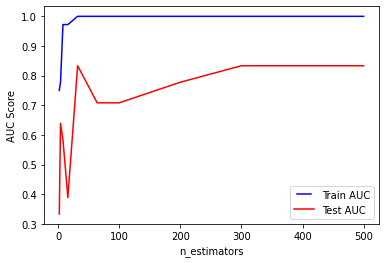

In [ ]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [ ]:
n_estimators = [50, 55, 60, 65, 70, 75, 80]
train_result_rf = []
test_result_rf = []

In [ ]:
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='gini')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

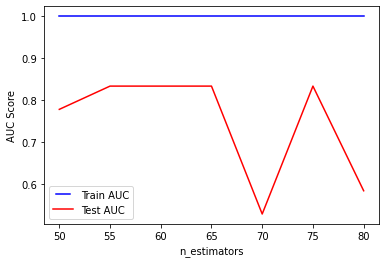

In [ ]:
line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators = 60)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Random Forest): ',rf_accuracy,'%')

Accuracy(Random Forest):  69.23 %


#### Random Forest with entropy criterion

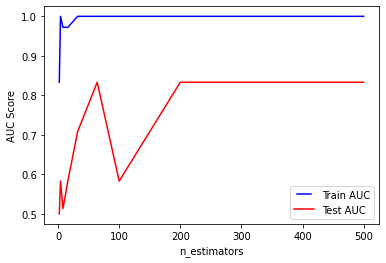

In [ ]:
n_estimators = [2, 4, 8, 16, 32, 64, 100, 200, 300, 400, 500]
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='entropy')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

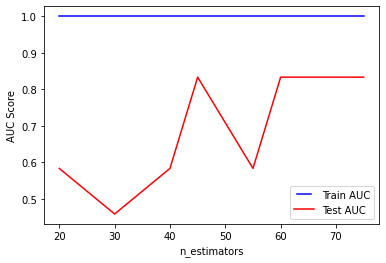

In [ ]:
n_estimators = [20, 30, 40, 45, 50, 55, 60, 65, 70, 75]
train_result_rf = []
test_result_rf = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, criterion='entropy')
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_result_rf.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_result_rf.append(roc_auc)

line1, = plt.plot(n_estimators, train_result_rf, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_result_rf, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=50, criterion='entropy')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy(Random Forest): ',rf_accuracy,'%')

Accuracy(Random Forest):  76.92 %


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(kernel="linear", C=1000)
nb_clf = GaussianNB()
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=2)
knn_clf = KNeighborsClassifier(n_neighbors=38)

voting_clf = VotingClassifier(
	estimators = [('lr', log_clf), ('rf', rnd_clf), ('knn',knn_clf),('dt',dt_clf),('nb', nb_clf)])    
voting_clf.fit(X_train, y_train)
y_pred=voting_clf.predict(X_test)

vot_accuracy = round(accuracy_score(y_test,y_pred)*100,2)
print('\n\nAccuracy(Voting Classifier) for Training Dataset :', voting_clf.score(X_train, y_train)*100, "%, ",'Accuracy(Voting Classifier) for Testing Dataset: ',vot_accuracy,'%')



Accuracy(Voting Classifier) for Training Dataset : 100.0 %,  Accuracy(Voting Classifier) for Testing Dataset:  61.54 %


In [ ]:
from sklearn.ensemble import BaggingClassifier

### Bagging (KNeighborsClassifier)

In [ ]:
n =30
l_knn=[]
for i in range(1,n):
  bg =BaggingClassifier(KNeighborsClassifier(n_neighbors=5),max_samples=0.7,max_features=0.7,n_estimators=i)
  bg.fit(X_train,y_train)
  l_knn.append(bg.score(X_test,y_test))


In [ ]:
#print("The Best Accuracy is:",acc.max()*100,"% with n_estimator=",acc.argmax()+1)
print("accuracy = " + str(max(l_knn))+ " with estimator "+ str(1+l_knn.index(max(l_knn))))


accuracy = 0.9230769230769231 with estimator 4


Bagging (Decision Tree)

In [ ]:
n =30
l_dt=[]
for i in range(1,n):
  bg_dt = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),max_samples=0.5,max_features=1.0,n_estimators=i)
  bg_dt.fit(X_train,y_train)
  l_dt.append(bg_dt.score(X_test,y_test))


In [ ]:
#print(l_dt)
print("accuracy = " + str(max(l_dt))+ " with estimator "+ str(1+l_dt.index(max(l_dt))))

accuracy = 0.8461538461538461 with estimator 10


###Bagging(LogisticRegression)

In [ ]:
n =30
l_lr=[]
for i in range(1,n):
  bg_lr= BaggingClassifier(LogisticRegression(),max_samples=0.5,max_features=1.0,n_estimators=i)
  bg_lr.fit(X_train,y_train)
  l_lr.append(bg_lr.score(X_test,y_test))



In [ ]:

print("accuracy = " + str(max(l_lr))+ " with estimator "+ str(1+l_lr.index(max(l_lr))))

accuracy = 0.9230769230769231 with estimator 2


### Bagging (SVM)

In [ ]:
bg = BaggingClassifier(svm.SVC(),max_samples=0.5,max_features=1.0,n_estimators=30)
bg.fit(X_train,y_train)
print(bg.score(X_train, y_train),bg.score(X_test,y_test))

0.7142857142857143 0.7692307692307693


In [ ]:
from sklearn.ensemble import  AdaBoostClassifier

####AdaBoosting (DecisionTree)

In [ ]:
from sklearn.model_selection import KFold
seed = 5
kfold = KFold(n_splits = 10, random_state = seed)
adb_dt =AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5,learning_rate=1)
adb_dt.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
from sklearn.model_selection import cross_val_score
results = cross_val_score(adb_dt, X_train,y_train, cv = kfold)
print(results.mean())

0.82


In [ ]:
adb_dt.score(X_test,y_test)

In [ ]:
adb_dt.score(X_train,y_train)

####AdaBoost(Logistic Regression)

In [ ]:
adb_lr =AdaBoostClassifier(LogisticRegression(),n_estimators=5,learning_rate=1)
adb_lr.fit(X_train,y_train)
print(adb_lr.score(X_test,y_test))
results = cross_val_score(adb_lr, X_train,y_train, cv = kfold)
print(results.mean())

####Adaboost(SVM)

In [ ]:

adb_svm= AdaBoostClassifier(SVC(probability=True, kernel='linear'),n_estimators=20,learning_rate=1)
adb_svm.fit(X_train,y_train)
print(adb_svm.score(X_test,y_test))
results = cross_val_score(adb_svm, X_train,y_train, cv = kfold)
print(results.mean())

0.6923076923076923
0.775


#### GradientBoosing 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error as MSE 
 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split


baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.769
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.57      1.00      0.73         4

    accuracy                           0.77        13
   macro avg       0.79      0.83      0.76        13
weighted avg       0.87      0.77      0.78        13



######Tune Learning rate and n_estimator

In [ ]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([0.18730054, 0.3404109 , 0.54393125, 0.77478428, 0.97925367,
         1.1956079 , 1.47592487, 1.69854093, 0.2322422 , 0.36959391,
         0.60336866, 0.8458497 , 1.00912089, 1.26489487, 1.48222079,
         1.75824409, 0.31544943, 0.45756941, 0.72619352, 0.94181695,
         1.16377673, 1.39370561, 1.61599798, 1.85339823, 0.3083127 ,
         0.77276115, 1.40141792, 1.95357404, 2.18499517, 2.38609452,
         2.64670353, 2.84973845, 0.30128274, 0.79170518, 1.5186955 ,
         2.16972151, 2.77274609, 3.40897169, 3.86892467, 4.23377695,
         0.26590462, 0.67994909, 1.40602126, 2.13329582, 2.89672327,
         3.64247503, 4.43365612, 4.40269046]),
  'mean_score_time': array([0.00950599, 0.00884452, 0.00873227, 0.01038747, 0.01137061,
         0.00829525, 0.0106442 , 0.01118913, 0.01116729, 0.0108067 ,
         0.00930967, 0.01069732, 0.00873089, 0.01049986, 0.01344376,
         0.0110476 , 0.01086817, 0.01203384, 0.01018453, 0.00887403,
         0.01139259,

######Tune max_depth

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([2.61653104, 2.69769077, 2.63597889, 2.49000378, 2.48978004,
         2.00115576]),
  'mean_score_time': array([0.01355343, 0.01802163, 0.0116025 , 0.01175375, 0.01428351,
         0.00835991]),
  'mean_test_score': array([0.86      , 0.83777778, 0.83777778, 0.81777778, 0.81777778,
         0.81777778]),
  'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'max_depth': 2},
   {'max_depth': 3},
   {'max_depth': 4},
   {'max_depth': 5},
   {'max_depth': 6},
   {'max_depth': 7}],
  'rank_test_score': array([1, 2, 2, 4, 4, 4], dtype=int32),
  'split0_test_score': array([0.8, 0.8, 0.8, 0.7, 0.7, 0.7]),
  'split1_test_score': array([0.8, 0.8, 0.8, 0.8, 0.8, 0.8]),
  'split2_test_score': array([0.7, 0.7, 0.7, 0.7, 0.7, 0.7]),
  'split3_test_score': array([1., 1., 1., 1., 1., 1.]),
  'split4_test_score': array([1.        , 0.88888889

#####Tune Subsample

In [ ]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.cv_results_, tuning.best_params_, tuning.best_score_

({'mean_fit_time': array([1.80591207, 1.79868522, 1.80086637, 1.81952934, 1.7725523 ,
         1.79937673, 1.15948396]),
  'mean_score_time': array([0.01096168, 0.01433759, 0.01211324, 0.01331005, 0.01434302,
         0.01112919, 0.00933065]),
  'mean_test_score': array([0.63333333, 0.63333333, 0.63333333, 0.63333333, 0.63333333,
         0.63333333, 0.67777778]),
  'param_subsample': masked_array(data=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9},
   {'subsample': 0.95},
   {'subsample': 1}],
  'rank_test_score': array([2, 2, 2, 2, 2, 2, 1], dtype=int32),
  'split0_test_score': array([0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]),
  'split1_test_score': array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6]),
  'split2_test_score': array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 

####After Tuning(GradientBoost)

In [ ]:
model1 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=750,max_depth=2, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
predictors=list(X_train)
print('Accuracy of the GBM on test set: {:.2f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBM on test set: 0.77
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.57      1.00      0.73         4

    accuracy                           0.77        13
   macro avg       0.79      0.83      0.76        13
weighted avg       0.87      0.77      0.78        13



####XGBoosting 

In [ ]:

from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 53.85%


####Tuning1

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

({'mean_fit_time': array([1.41168346, 1.02619548, 0.90695424, 1.3770442 , 0.97129769,
         0.96266727, 1.33131132, 0.91683402, 0.92645516, 1.31972566,
         1.08099399, 0.76955595]),
  'mean_score_time': array([0.12834425, 0.13313293, 0.16670122, 0.14017944, 0.13444648,
         0.14399776, 0.16085625, 0.17309608, 0.12239547, 0.16636376,
         0.11465545, 0.09494963]),
  'mean_test_score': array([0.89047619, 0.86269841, 0.5       , 0.89047619, 0.86269841,
         0.5       , 0.89047619, 0.86269841, 0.5       , 0.89047619,
         0.86269841, 0.5       ]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, False, False, False, False, False, False,
       

#####Tuning2

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=4,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.92325754, 0.86223702, 0.90407214, 0.94662137, 0.819414  ]),
  'mean_score_time': array([0.15008454, 0.2025269 , 0.12233806, 0.13013463, 0.07556028]),
  'mean_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4}],
  'rank_test_score': array([1, 1, 1, 1, 1], dtype=int32),
  'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split2_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split3_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'split4_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5]),
  'std_fit_time': array([0.0894618 , 0.13591802, 0.08374211, 0.07605362, 0.07898533]),
  'std_score_time': array([0.03603817, 0.04063282, 0.04014

####After Tuning 

In [ ]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb4.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.85%


####Stacking 

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


In [ ]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
def stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [ ]:
def getmodels():
	models = dict()
	models['lr'] = LogisticRegression()
	models['knn'] = KNeighborsClassifier()
	models['cart'] = DecisionTreeClassifier()
	models['svm'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = stacking()
	return models

In [ ]:
 
# evaluate a give model using cross-validation
def evaluate_model(model, X_train, y_train):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
	return scores
 

>lr 0.851 (0.113)
>knn 0.846 (0.100)
>cart 0.754 (0.140)
>svm 0.846 (0.103)
>bayes 0.581 (0.179)
>stacking 0.852 (0.116)


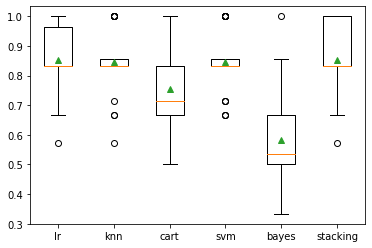

In [ ]:
models = getmodels()
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()